## This script contains the following:
1. Importing libraries and data and renaming columns
2. The elbow technique
3. k-means clustering

### Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
%matplotlib inline

In [3]:
# Define path
path = r'C:\Users\shrav\_Data_Analysis_CF\Citi_bikes_project'

In [4]:
citi = pd.read_csv(os.path.join(path, '02 Data','prepared data', 'citi_6.1.csv'), index_col = False)

In [5]:
citi.head()

,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,Trip category,ride_start_date,ride_start_time
0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28,10-20 minutes,2013-09-09,2024-10-21 18:18:55
1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34,under 10 minutes,2013-09-12,2024-10-21 18:38:53
2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05,under 10 minutes,2013-09-18,2024-10-21 19:44:04
3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58,under 10 minutes,2013-09-28,2024-10-21 11:54:37
4,4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08,under 10 minutes,2013-09-27,2024-10-21 22:01:01


In [6]:
citi.shape

(41017, 20)

In [7]:
#getting rid of unesseary columns
citi=citi[['day_of_week','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'ride_start', 'ride_end',
       'Trip category', 'ride_start_date', 'ride_start_time']]

In [8]:
citi.shape

(41017, 19)

# cleaning and manipulating data

In [9]:
# Define data types for specific columns
data_types = {
    'ride_start_date': 'datetime64'
}

In [10]:
file_path = os.path.join(path, '02 Data','prepared data','citi_6.1.csv')

In [11]:
parse_dates = ['ride_start_date']

In [12]:
citi = pd.read_csv(file_path, parse_dates=parse_dates)

In [13]:
citi.head()

,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,Trip category,ride_start_date,ride_start_time
0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28,10-20 minutes,2013-09-09,2024-10-21 18:18:55
1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34,under 10 minutes,2013-09-12,2024-10-21 18:38:53
2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05,under 10 minutes,2013-09-18,2024-10-21 19:44:04
3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58,under 10 minutes,2013-09-28,2024-10-21 11:54:37
4,4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08,under 10 minutes,2013-09-27,2024-10-21 22:01:01


In [14]:
citi=citi[['day_of_week','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'ride_start', 'ride_end',
       'Trip category', 'ride_start_date', 'ride_start_time']]

### messing around by day

In [15]:
#rides per day
day_counts = citi.groupby('day_of_week')['ride_start_date'].count()

In [16]:
day_counts

day_of_week
Fri    6320
Mon    6492
Sat    4676
Sun    5190
Thu    5972
Tue    6168
Wed    6199
Name: ride_start_date, dtype: int64

In [17]:
#avg trip duration by day
day_avg_duration = citi.groupby('day_of_week')['trip_duration'].mean()

In [18]:
day_avg_duration

day_of_week
Fri    696.092405
Mon    689.296519
Sat    710.915526
Sun    723.140848
Thu    687.640656
Tue    683.814364
Wed    692.401355
Name: trip_duration, dtype: float64

In [19]:
#merging DF together
result = pd.DataFrame({'day_of_week': day_counts.index, 'ride_count': day_counts.values, 'avg_duration': day_avg_duration.values})

In [20]:
result

,day_of_week,ride_count,avg_duration
0,Fri,6320,696.092405
1,Mon,6492,689.296519
2,Sat,4676,710.915526
3,Sun,5190,723.140848
4,Thu,5972,687.640656
5,Tue,6168,683.814364
6,Wed,6199,692.401355


In [21]:
# avg age of rider by day
day_avg_age = citi.groupby('day_of_week')['birth_year'].mean()

In [22]:
day_avg_age

day_of_week
Fri    1975.559177
Mon    1975.486445
Sat    1976.988024
Sun    1976.918882
Thu    1975.230576
Tue    1975.254053
Wed    1975.291983
Name: birth_year, dtype: float64

In [23]:
#merging it together
result_1 = pd.DataFrame({'day_of_week': day_counts.index, 'ride_count': day_counts.values, 'avg_duration': day_avg_duration.values,'avg_age':day_avg_age.values})

In [24]:
result_1

,day_of_week,ride_count,avg_duration,avg_age
0,Fri,6320,696.092405,1975.559177
1,Mon,6492,689.296519,1975.486445
2,Sat,4676,710.915526,1976.988024
3,Sun,5190,723.140848,1976.918882
4,Thu,5972,687.640656,1975.230576
5,Tue,6168,683.814364,1975.254053
6,Wed,6199,692.401355,1975.291983


### messing around by hour

In [25]:
#rides per hour
hour_counts_1 = citi.groupby('start_hour')['ride_start_date'].count()

In [26]:
hour_counts_1

start_hour
0      403
1      257
2      158
3       90
4       73
5      191
6      863
7     1908
8     3023
9     2504
10    1759
11    1747
12    2258
13    2306
14    2259
15    2316
16    2866
17    4122
18    4041
19    2817
20    1848
21    1319
22    1109
23     780
Name: ride_start_date, dtype: int64

In [27]:
# avg trip duration by hour
hour_avg_duration = citi.groupby('start_hour')['trip_duration'].mean()

In [28]:
hour_avg_duration

start_hour
0     677.868486
1     647.210117
2     620.936709
3     584.422222
4     616.589041
5     570.586387
6     598.979143
7     668.484277
8     705.284155
9     668.774760
10    681.419557
11    675.744133
12    666.543401
13    679.187771
14    693.548915
15    705.407599
16    713.957083
17    722.178554
18    741.052215
19    720.935037
20    708.226190
21    707.300986
22    674.930568
23    686.223077
Name: trip_duration, dtype: float64

In [29]:
#merging together
hour_result = pd.DataFrame({'start_hour': hour_counts_1.index, 'ride_count': hour_counts_1.values, 'avg_duration': hour_avg_duration.values})

In [30]:
hour_result

,start_hour,ride_count,avg_duration
0,0,403,677.868486
1,1,257,647.210117
2,2,158,620.936709
3,3,90,584.422222
4,4,73,616.589041
5,5,191,570.586387
6,6,863,598.979143
7,7,1908,668.484277
8,8,3023,705.284155
9,9,2504,668.774760


In [31]:
 #avg age of rider on each hour
hour_avg_age = citi.groupby('start_hour')['birth_year'].mean()

In [32]:
#adding avg age 
result_2 = pd.DataFrame({'start_hour': hour_counts_1.index, 'ride_count': hour_counts_1.values, 'avg_duration': hour_avg_duration.values,'avg_age': hour_avg_age.values})

In [33]:
result_2

,start_hour,ride_count,avg_duration,avg_age
0,0,403,677.868486,1979.364764
1,1,257,647.210117,1979.521401
2,2,158,620.936709,1978.848101
3,3,90,584.422222,1981.111111
4,4,73,616.589041,1974.657534
5,5,191,570.586387,1975.727749
6,6,863,598.979143,1974.477404
7,7,1908,668.484277,1974.099057
8,8,3023,705.284155,1974.921270
9,9,2504,668.774760,1974.972045


In [34]:
#younger people ride in the late hours

In [35]:
# hour of ride count by day
hour_counts = citi.groupby([citi['start_hour'], citi['ride_start_date'].dt.date])['ride_start_date'].count()

In [36]:
hour_counts

start_hour  ride_start_date
0           2013-09-01         14
            2013-09-02         15
            2013-09-03          5
            2013-09-04          9
            2013-09-05         12
                               ..
23          2013-09-26         38
            2013-09-27         42
            2013-09-28         47
            2013-09-29         21
            2013-09-30         16
Name: ride_start_date, Length: 711, dtype: int64

In [37]:
# average rides per hour
avg_rides_per_hour = hour_counts.groupby('start_hour').mean().reset_index()

In [38]:
avg_rides_per_hour

,start_hour,ride_start_date
0,0,13.433333
1,1,8.566667
2,2,5.448276
3,3,3.461538
4,4,2.703704
5,5,6.586207
6,6,28.766667
7,7,63.600000
8,8,100.766667
9,9,83.466667


In [39]:
#avg age of rider on each hour
hour_avg_age = citi.groupby('start_hour')['birth_year'].mean()

In [40]:
hour_avg_age

start_hour
0     1979.364764
1     1979.521401
2     1978.848101
3     1981.111111
4     1974.657534
5     1975.727749
6     1974.477404
7     1974.099057
8     1974.921270
9     1974.972045
10    1974.802729
11    1974.760160
12    1975.172276
13    1975.002602
14    1975.042497
15    1974.935665
16    1974.916609
17    1975.317807
18    1976.312051
19    1977.108271
20    1978.429113
21    1978.040940
22    1978.482417
23    1978.702564
Name: birth_year, dtype: float64

In [41]:
result_1

,day_of_week,ride_count,avg_duration,avg_age
0,Fri,6320,696.092405,1975.559177
1,Mon,6492,689.296519,1975.486445
2,Sat,4676,710.915526,1976.988024
3,Sun,5190,723.140848,1976.918882
4,Thu,5972,687.640656,1975.230576
5,Tue,6168,683.814364,1975.254053
6,Wed,6199,692.401355,1975.291983


In [42]:
result_2

,start_hour,ride_count,avg_duration,avg_age
0,0,403,677.868486,1979.364764
1,1,257,647.210117,1979.521401
2,2,158,620.936709,1978.848101
3,3,90,584.422222,1981.111111
4,4,73,616.589041,1974.657534
5,5,191,570.586387,1975.727749
6,6,863,598.979143,1974.477404
7,7,1908,668.484277,1974.099057
8,8,3023,705.284155,1974.921270
9,9,2504,668.774760,1974.972045


# 2. The elbow technique

In [43]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [44]:
score = [kmeans[i].fit(result_2).score(result_2) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[-33537693.980744734,
 -9455981.928056188,
 -4017960.5667220782,
 -1889939.1156131232,
 -878412.6161215112,
 -356398.9811256247,
 -199937.26363942065,
 -139984.53832306748,
 -101269.75583639526]

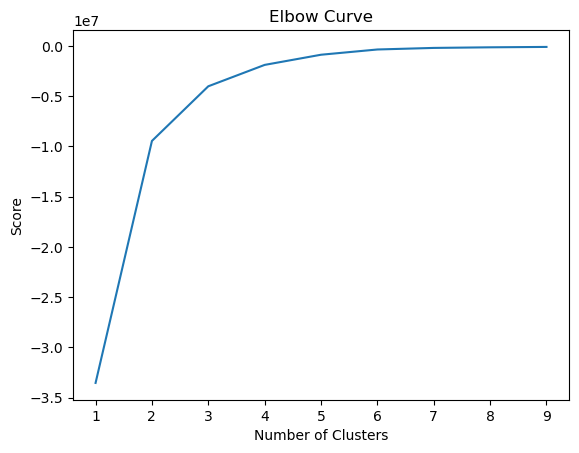

In [45]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Choosing 4 clusters based on the elbow curve.
### The elbow point on the curve indicates the optimal number of clusters,
### where the rate of improvement in the score starts to decrease significantly.
### Beyond 4 clusters, the reduction in variation becomes minimal, making 4 the ideal choice.


# 3. k-means clustering

In [46]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [47]:
# Fit the k-means object to the data.
kmeans.fit(result_2)

C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [48]:
result_2['clusters'] = kmeans.fit_predict(result_2)

C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [49]:
result_2.head()

,start_hour,ride_count,avg_duration,avg_age,clusters
0,0,403,677.868486,1979.364764,0
1,1,257,647.210117,1979.521401,0
2,2,158,620.936709,1978.848101,0
3,3,90,584.422222,1981.111111,0
4,4,73,616.589041,1974.657534,0


In [50]:
#cluster count
result_2['clusters'].value_counts()

clusters
0    8
1    8
3    6
2    2
Name: count, dtype: int64

In [51]:
by_hour = result_2[['ride_count','avg_duration','avg_age']]

In [52]:
by_hour

,ride_count,avg_duration,avg_age
0,403,677.868486,1979.364764
1,257,647.210117,1979.521401
2,158,620.936709,1978.848101
3,90,584.422222,1981.111111
4,73,616.589041,1974.657534
5,191,570.586387,1975.727749
6,863,598.979143,1974.477404
7,1908,668.484277,1974.099057
8,3023,705.284155,1974.921270
9,2504,668.774760,1974.972045


# The elbow technique

In [53]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [54]:
score = [kmeans[i].fit(by_hour).score(by_hour) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score


C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[-33536543.980744734,
 -9454966.328056188,
 -4016982.300055412,
 -1889254.28227979,
 -878011.1161215112,
 -356007.114458958,
 -199594.39697275395,
 -139653.67165640078,
 -100955.08916972858]

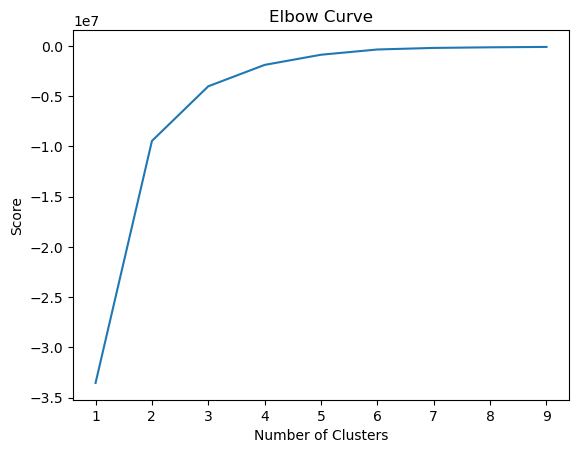

In [55]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# 4 clusters based on visualization

# kmeans

In [56]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [57]:
# Fit the k-means object to the data.
kmeans.fit(by_hour)

C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [58]:
by_hour['clusters'] = kmeans.fit_predict(by_hour)

C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shrav\AppData\Local\Temp\ipykernel_19756\2371176289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_hour['clusters'] = kmeans.fit_predict(by_hour)


In [59]:
by_hour.head()

,ride_count,avg_duration,avg_age,clusters
0,403,677.868486,1979.364764,0
1,257,647.210117,1979.521401,0
2,158,620.936709,1978.848101,0
3,90,584.422222,1981.111111,0
4,73,616.589041,1974.657534,0


In [60]:
#cluster count
by_hour['clusters'].value_counts()

clusters
0    8
1    8
3    6
2    2
Name: count, dtype: int64

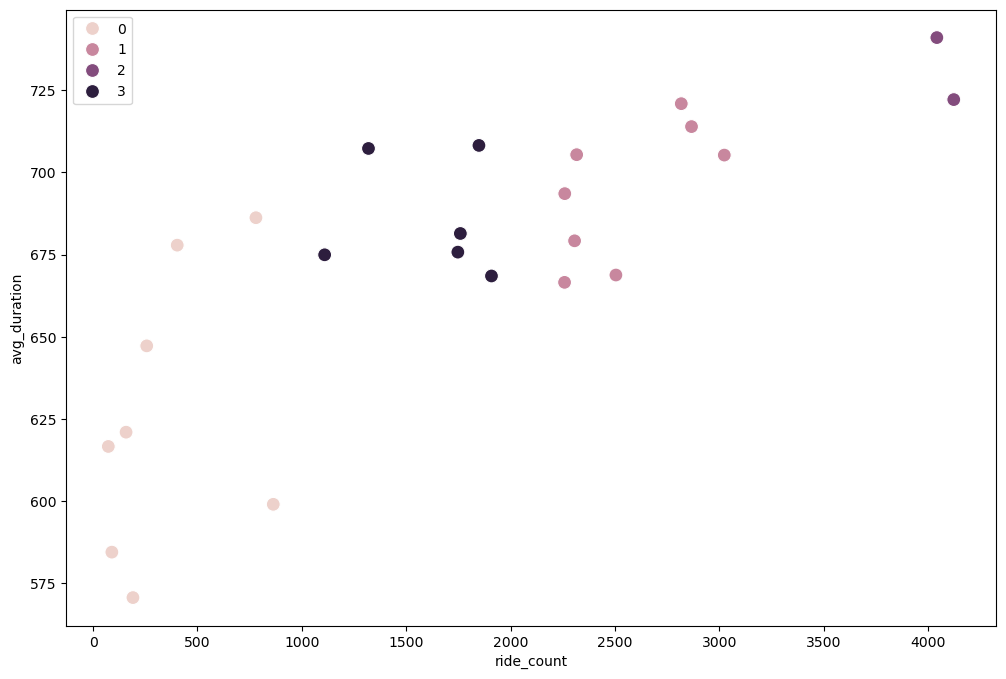

In [61]:
# ride count and avg duration
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=by_hour['ride_count'], y=by_hour['avg_duration'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('ride_count') # Label x-axis.
plt.ylabel('avg_duration') # Label y-axis.
plt.show()

## During busier windows of time, the average ride duration tends to be longer.
## This makes sense as increased demand likely leads to congestion, slower travel times, or riders opting for longer trips.
## External factors like traffic, availability of bikes/docks, and potential detours may contribute to longer ride durations during peak hours.

# Descriptive statistics on group by DF

In [62]:
by_hour.loc[by_hour['clusters'] == 0, 'cluster'] = 'light pink'
by_hour.loc[by_hour['clusters'] == 1, 'cluster'] = 'pink'
by_hour.loc[by_hour['clusters'] == 2, 'cluster'] = 'purple'
by_hour.loc[by_hour['clusters'] == 3, 'cluster'] = 'dark purple'

In [63]:
by_hour.groupby('cluster').agg({'ride_count':['mean', 'median'], 
                         'avg_duration':['mean', 'median'], 
                         'avg_age':['mean', 'median']})

ride_count         avg_duration                  avg_age  \
                  mean  median         mean      median         mean   
cluster                                                                
dark purple   1615.000  1753.0   686.017618  678.581845  1976.435736   
light pink     351.875   224.0   625.351898  618.762875  1977.801329   
pink          2543.625  2410.0   694.204840  699.416535  1975.258904   
purple        4081.500  4081.5   731.615384  731.615384  1975.814929   

                          
                  median  
cluster                   
dark purple  1976.421834  
light pink   1978.775333  
pink         1974.987323  
purple       1975.814929

#### Analysis of Clusters:
#### The average ages and ride durations across the clusters show minimal differences and are not that significant.
#### However, the ride counts vary greatly between clusters.
#### In the "dark purple" cluster, we observe the highest ride counts, and these riders also tend to take the longest rides on average.
#### This could be useful in an analytics pipeline where the data is divided by gender or subscriber status to check 
#### if similar trends hold across different groups.
#### Additionally, since the dataset is structured by days of the week, further analysis could reveal whether 
#### these cluster patterns are consistent over time or vary based on categorical factors like weekdays vs. weekends.


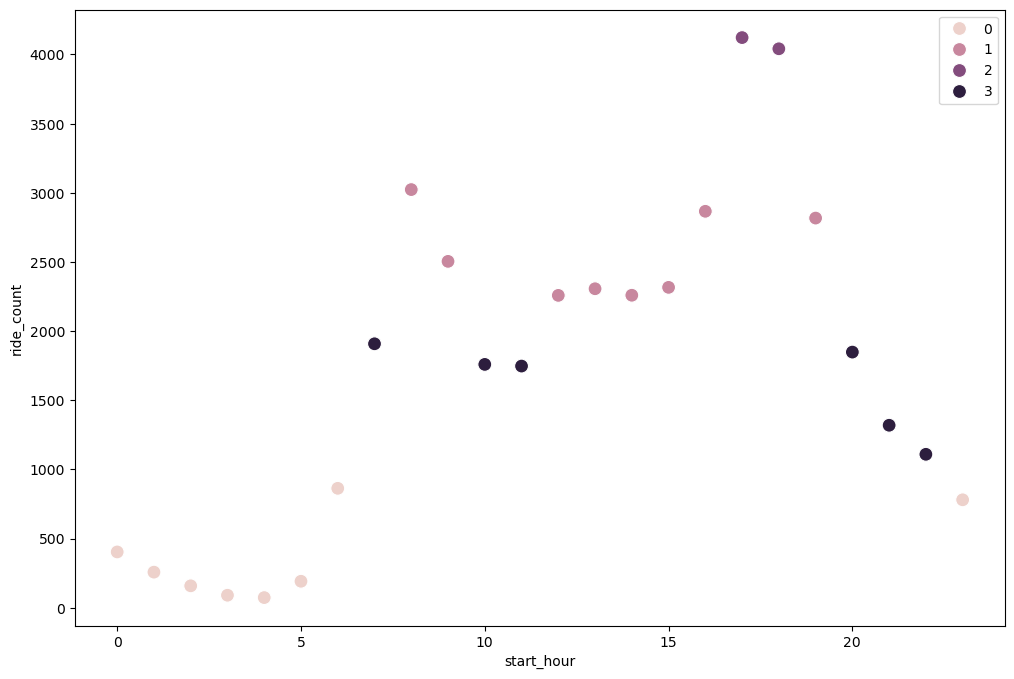

In [64]:
# start hour and ride count
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=result_2['start_hour'], y=result_2['ride_count'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('start_hour') # Label x-axis.
plt.ylabel('ride_count') # Label y-axis.
plt.show()

### I am unsure if this is a valid use of KMeans because the hour isn't a strictly numeric variable.However, the analysis illustrates that ride counts are lower in the early morning hours,rising from 6 AM and peaking at 9 AM.After a slight drop, ride counts rise again, peaking between 5 PM and 6 PM, before gradually declining through the night.This pattern indicates that people primarily use the bikes before and after work hours.


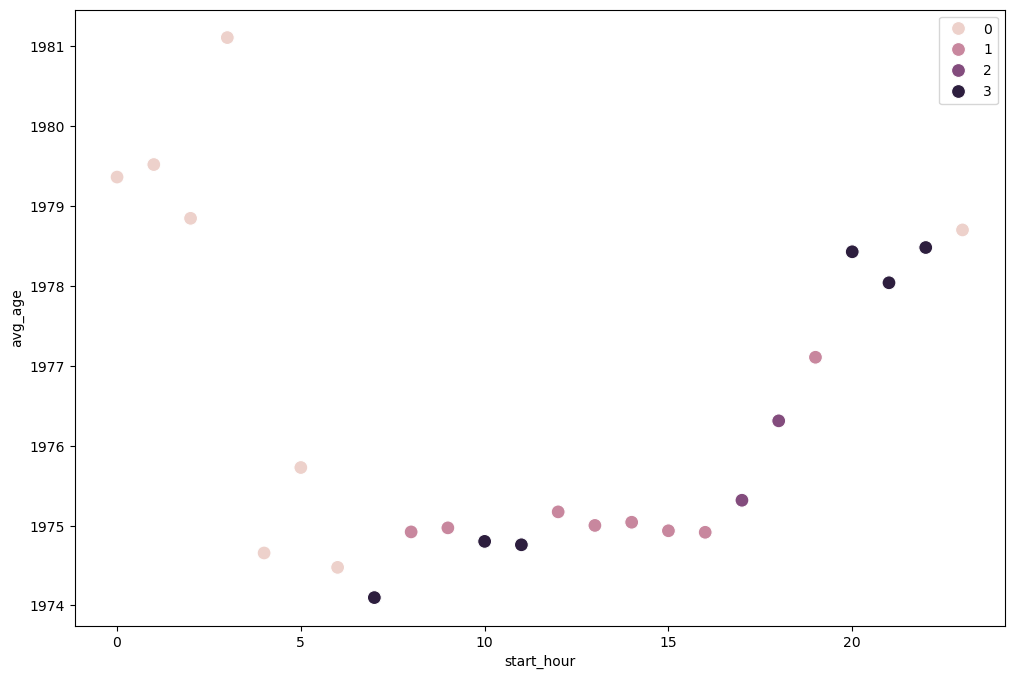

In [65]:
# start hour and avg age
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=result_2['start_hour'], y=result_2['avg_age'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('start_hour') # Label x-axis.
plt.ylabel('avg_age') # Label y-axis.
plt.show()

### Younger people tend to use bikes during nighttime hours, indicating a preference for cycling later in the day or evening.


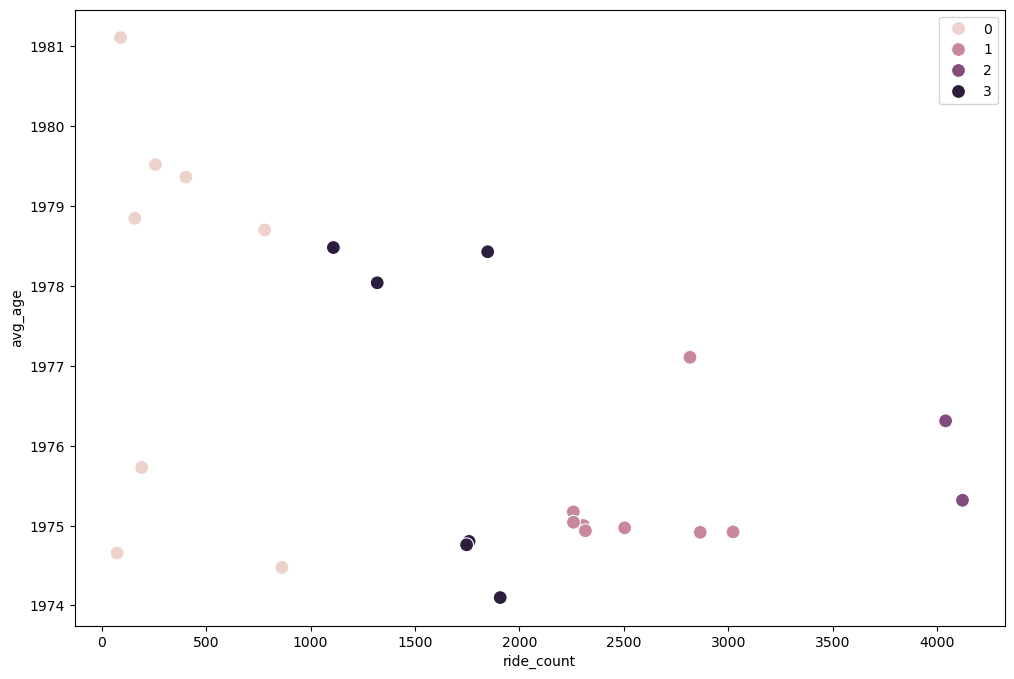

In [66]:
# Plot the clusters 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=by_hour['ride_count'], y=by_hour['avg_age'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('ride_count') # Label x-axis.
plt.ylabel('avg_age') # Label y-axis.
plt.show()

### This observation might be less clear, but it suggests that younger riders may go on rides more frequently than older riders during off-peak times of the day. This could indicate a different lifestyle or preference for younger users, who may take advantage of quieter hours for biking.


In [67]:
print(by_hour.dtypes)
print(by_hour.head())

ride_count        int64
avg_duration    float64
avg_age         float64
clusters          int32
cluster          object
dtype: object
   ride_count  avg_duration      avg_age  clusters     cluster
0         403    677.868486  1979.364764         0  light pink
1         257    647.210117  1979.521401         0  light pink
2         158    620.936709  1978.848101         0  light pink
3          90    584.422222  1981.111111         0  light pink
4          73    616.589041  1974.657534         0  light pink


In [68]:
by_hour_numeric = by_hour.select_dtypes(include=[np.number])

In [69]:
by_hour_encoded = pd.get_dummies(by_hour, drop_first=True)

In [70]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(by_hour_numeric)  # or by_hour_encoded if you encoded categorical data

C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [71]:
cluster_labels = kmeans.labels_

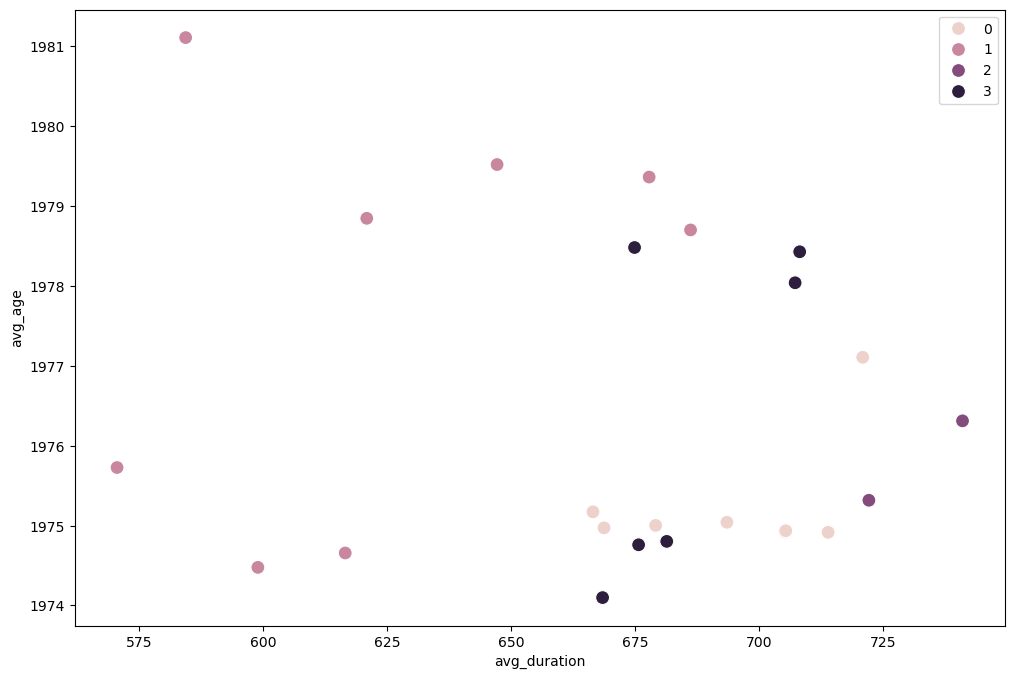

In [72]:
# Plot the clusters 
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=by_hour['avg_duration'], y=by_hour['avg_age'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('avg_duration') # Label x-axis.
plt.ylabel('avg_age') # Label y-axis.
plt.show()

#### Older riders tend to take longer rides compared to younger riders, indicating a preference for extended biking experiences.


In [73]:
citi_3=citi[[ 'trip_duration', 'birth_year']]

In [74]:
citi_3

,trip_duration,birth_year
0,993,1968.0
1,581,1983.0
2,361,1989.0
3,561,1988.0
4,427,1986.0
...,...,...
41012,975,1973.0
41013,1541,1975.0
41014,1191,1970.0
41015,1050,1961.0


# The elbow technique

In [75]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [76]:
score = [kmeans[i].fit(citi_3).score(citi_3) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\clust

[-6740526088.44659,
 -1995935770.5308297,
 -953017645.5098401,
 -554768567.6475799,
 -367615250.90935135,
 -257445835.35100302,
 -193121782.07125178,
 -150685209.34471214,
 -120334951.58466575]

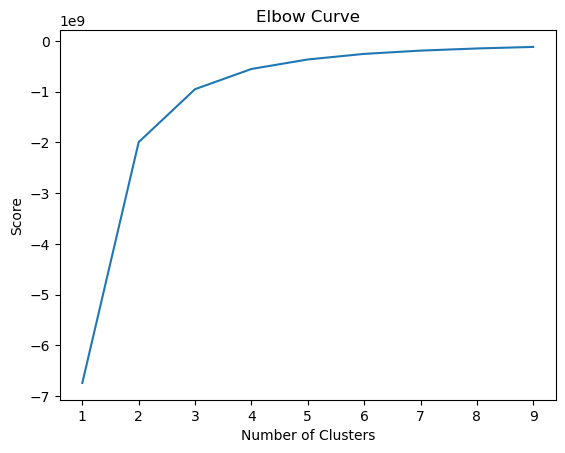

In [77]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Based on the analysis and insights gathered, I have chosen to create 5 clusters for a more detailed understanding of the ride patterns.


## K-means

In [78]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [79]:
kmeans.fit(citi_3)

C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [80]:
citi_3['clusters'] = kmeans.fit_predict(citi_3)

C:\Users\shrav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shrav\AppData\Local\Temp\ipykernel_19756\3806875805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  citi_3['clusters'] = kmeans.fit_predict(citi_3)


In [81]:
citi_3.head()

,trip_duration,birth_year,clusters
0,993,1968.0,0
1,581,1983.0,2
2,361,1989.0,3
3,561,1988.0,2
4,427,1986.0,2


In [82]:
citi_3['clusters'].value_counts()

clusters
2    12305
3    11986
0     8326
4     5253
1     3147
Name: count, dtype: int64

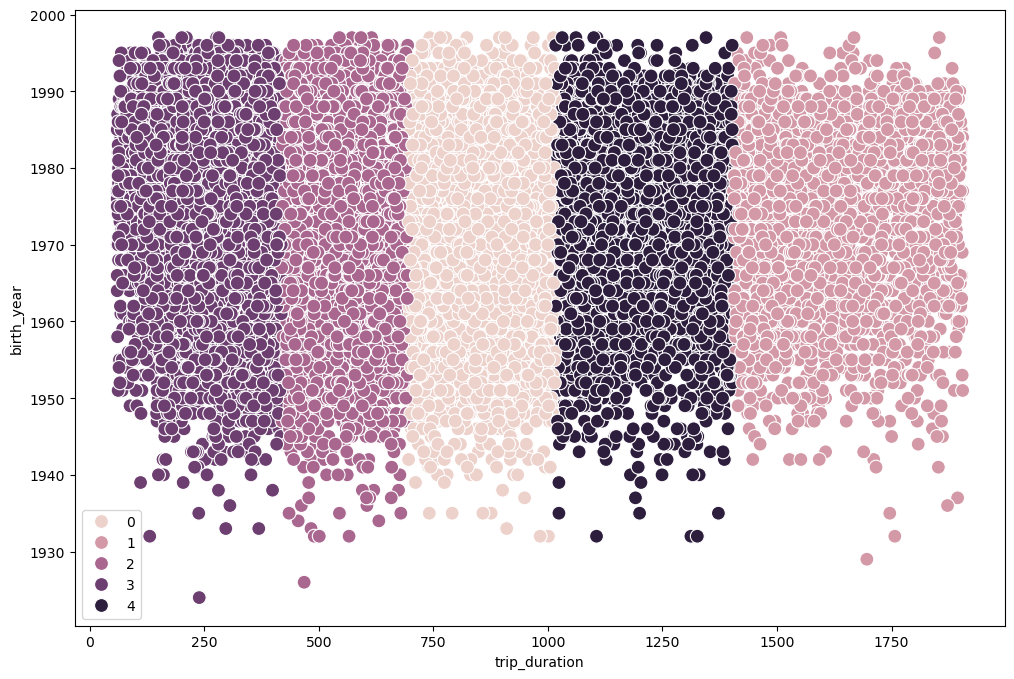

In [83]:
# Plot the clusters

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=citi_3['trip_duration'], y=citi_3['birth_year'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('trip_duration') # Label x-axis.
plt.ylabel('birth_year') # Label y-axis.
plt.show()

# doesnt tell us much

In [84]:
citi.head()

,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,Trip category,ride_start_date,ride_start_time
0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28,10-20 minutes,2013-09-09,2024-10-21 18:18:55
1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34,under 10 minutes,2013-09-12,2024-10-21 18:38:53
2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05,under 10 minutes,2013-09-18,2024-10-21 19:44:04
3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58,under 10 minutes,2013-09-28,2024-10-21 11:54:37
4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08,under 10 minutes,2013-09-27,2024-10-21 22:01:01


In [85]:
# saving to csv
citi.to_csv(os.path.join(path, '02 Data','prepared data', 'citi_7.csv'))